In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
data = pd.read_csv('all_stocks_2006-01-01_to_2018-01-01.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93612 entries, 0 to 93611
Data columns (total 7 columns):
Date      93612 non-null object
Open      93587 non-null float64
High      93602 non-null float64
Low       93592 non-null float64
Close     93612 non-null float64
Volume    93612 non-null int64
Name      93612 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 5.0+ MB


In [4]:
data['Name'].unique()

array(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT',
       'GOOGL', 'AMZN', 'AABA'], dtype=object)

In [5]:
df_ibm= data[data['Name']== 'AMZN']

In [6]:
df_ibm.head()

,Date,Open,High,Low,Close,Volume,Name
87574,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
87575,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
87576,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
87577,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
87578,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


In [7]:
df_ibm= df_ibm[['Date','Close']]

In [8]:
df_ibm.head()

,Date,Close
87574,2006-01-03,47.58
87575,2006-01-04,47.25
87576,2006-01-05,47.65
87577,2006-01-06,47.87
87578,2006-01-09,47.08


In [9]:
df_ibm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3019 entries, 87574 to 90592
Data columns (total 2 columns):
Date     3019 non-null object
Close    3019 non-null float64
dtypes: float64(1), object(1)
memory usage: 70.8+ KB


In [10]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df_ibm['Date']=df_ibm['Date'].apply(dateparse)
print (df_ibm.head())

            Date  Close
87574 2006-01-03  47.58
87575 2006-01-04  47.25
87576 2006-01-05  47.65
87577 2006-01-06  47.87
87578 2006-01-09  47.08


In [11]:
df_ibm.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [12]:
df_ibm=df_ibm.set_index('Date')

In [13]:
df_ibm.head()

,Close
Date,
2006-01-03,47.58
2006-01-04,47.25
2006-01-05,47.65
2006-01-06,47.87
2006-01-09,47.08


In [14]:
df_ibm.index

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=3019, freq=None)

In [15]:
df_ibm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 1 columns):
Close    3019 non-null float64
dtypes: float64(1)
memory usage: 47.2 KB


### Resampling the dataset into days

In [16]:
ts=df_ibm['Close']

In [17]:
ts=ts.resample('D').bfill()

In [18]:
df_ibm=df_ibm.resample('D').bfill()

In [19]:
df_ibm.head()

,Close
Date,
2006-01-03,47.58
2006-01-04,47.25
2006-01-05,47.65
2006-01-06,47.87
2006-01-07,47.08


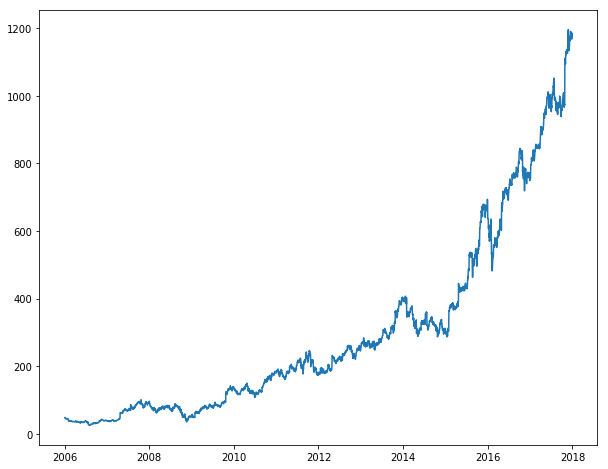

In [20]:
plt.figure(figsize=(10,8))
plt.plot(ts)

### Splitting dataset into Train and Test

In [21]:
split_point = len(df_ibm) - 365
dataset, validation = df_ibm[0:split_point], df_ibm[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

Dataset 4014, Validation 365


In [22]:
dataset.tail()

,Close
Date,
2016-12-25,771.40
2016-12-26,771.40
2016-12-27,771.40
2016-12-28,772.13
2016-12-29,765.15


In [23]:
validation.head()

,Close
Date,
2016-12-30,749.87
2016-12-31,753.67
2017-01-01,753.67
2017-01-02,753.67
2017-01-03,753.67


### Using the dataset for train

In [24]:
ts=dataset['Close']

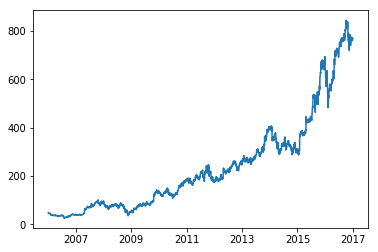

In [25]:
plt.plot(ts)

In [26]:
ts=dataset['Close']

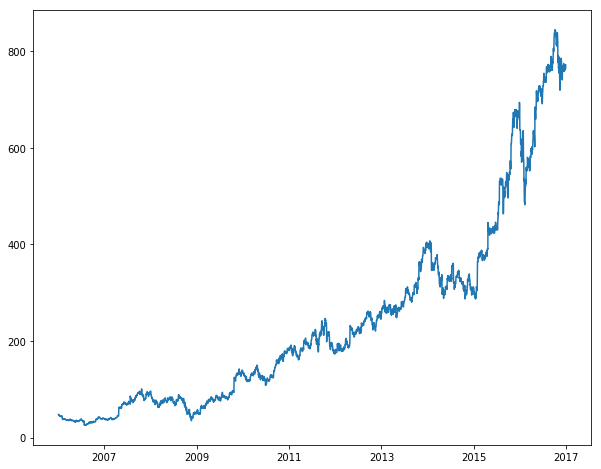

In [27]:
plt.figure(figsize=(10,8))
plt.plot(ts)

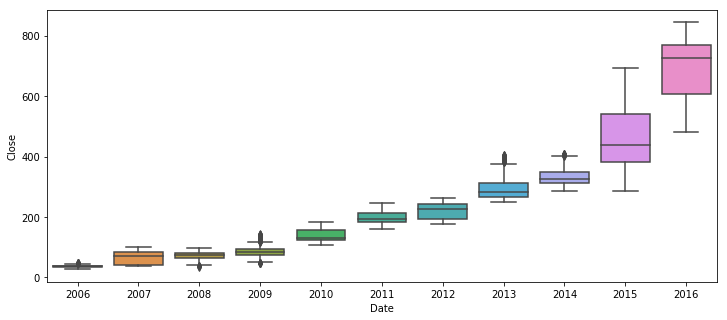

In [28]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(ts.index.year, ts, ax=ax)

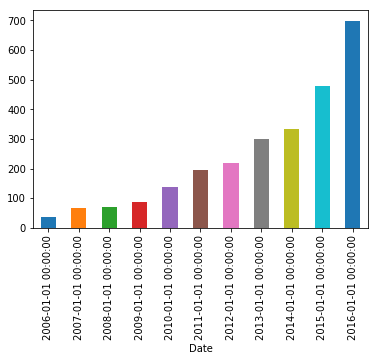

In [29]:
ts.resample('AS').mean().plot.bar()

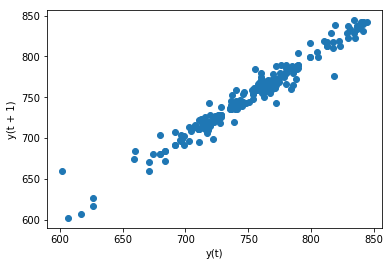

In [30]:
from pandas.plotting import lag_plot

lag_plot(ts.tail(250))

In [31]:
dataset['2006']

,Close
Date,
2006-01-03,47.58
2006-01-04,47.25
2006-01-05,47.65
2006-01-06,47.87
2006-01-07,47.08
2006-01-08,47.08
2006-01-09,47.08
2006-01-10,45.65
2006-01-11,44.93


### Checking for stationarity

In [32]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series.rolling(timeseries, window=365).mean()
    rolstd = pd.Series.rolling(timeseries, window=365).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

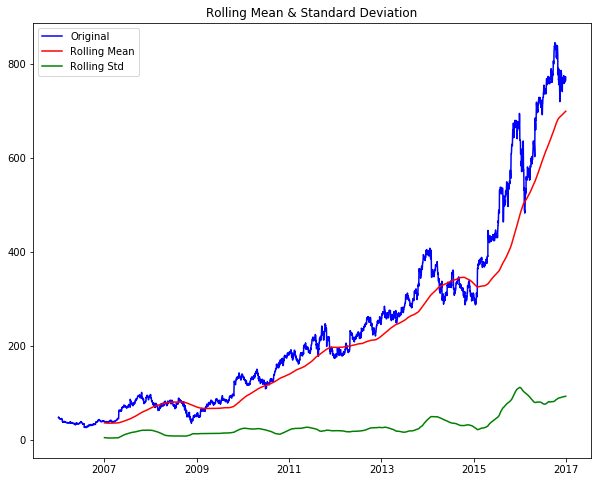

Results of Dickey-Fuller Test:
Test Statistic                    1.245360
p-value                           0.996285
#Lags Used                       28.000000
Number of Observations Used    3985.000000
Critical Value (10%)             -2.567156
Critical Value (5%)              -2.862266
Critical Value (1%)              -3.431992
dtype: float64


In [33]:
plt.figure(figsize=(10,8))
test_stationarity(ts)

# Estimating & Eliminating Trend

### log transform

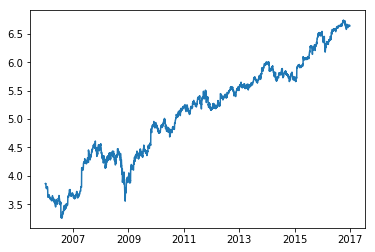

In [34]:
ts_log = np.log(ts)
plt.plot(ts_log)

###  Moving average

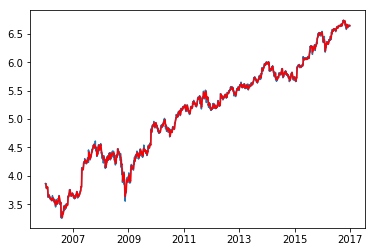

In [35]:
moving_avg = pd.Series.rolling(ts_log,7).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [36]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(30)

Date
2006-01-03         NaN
2006-01-04         NaN
2006-01-05         NaN
2006-01-06         NaN
2006-01-07         NaN
2006-01-08         NaN
2006-01-09   -0.006121
2006-01-10   -0.031050
2006-01-11   -0.039755
2006-01-12   -0.042302
2006-01-13   -0.030651
2006-01-14   -0.030035
2006-01-15   -0.020370
2006-01-16   -0.010704
2006-01-17   -0.005445
2006-01-18    0.003754
2006-01-19    0.006394
2006-01-20   -0.004049
2006-01-21   -0.007505
2006-01-22   -0.006625
2006-01-23   -0.005746
2006-01-24    0.000799
2006-01-25   -0.006448
2006-01-26    0.017283
2006-01-27    0.025130
2006-01-28    0.015401
2006-01-29    0.011438
2006-01-30    0.007475
2006-01-31    0.001784
2006-02-01   -0.018376
Freq: D, Name: Close, dtype: float64

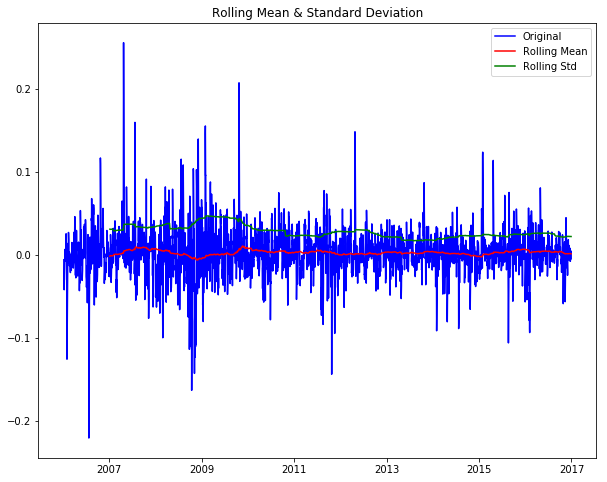

Results of Dickey-Fuller Test:
Test Statistic                  -19.532597
p-value                           0.000000
#Lags Used                        6.000000
Number of Observations Used    4001.000000
Critical Value (10%)             -2.567155
Critical Value (5%)              -2.862263
Critical Value (1%)              -3.431985
dtype: float64


In [37]:
plt.figure(figsize=(10,8))
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

### exponentially weighted moving average 

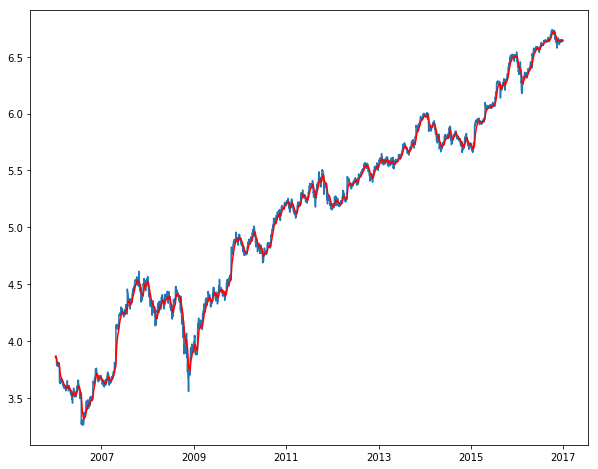

In [38]:
expwighted_avg = ts_log.ewm(halflife=7).mean()
plt.figure(figsize=(10,8))
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

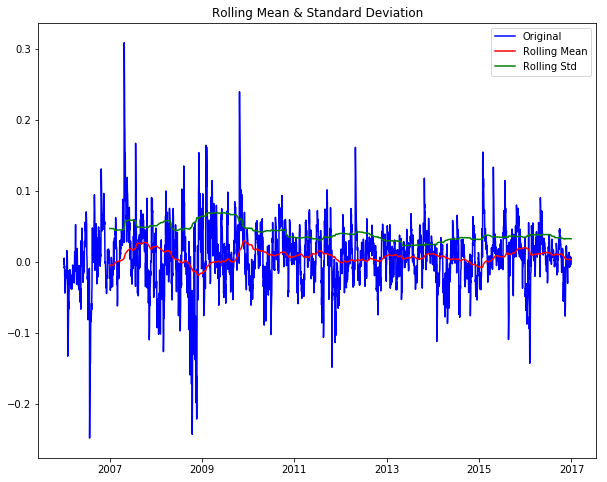

Results of Dickey-Fuller Test:
Test Statistic                -1.315933e+01
p-value                        1.317225e-24
#Lags Used                     4.000000e+00
Number of Observations Used    4.009000e+03
Critical Value (10%)          -2.567154e+00
Critical Value (5%)           -2.862261e+00
Critical Value (1%)           -3.431982e+00
dtype: float64


In [39]:
plt.figure(figsize=(10,8))
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

# Eliminating Trend and Seasonality

### Differencing

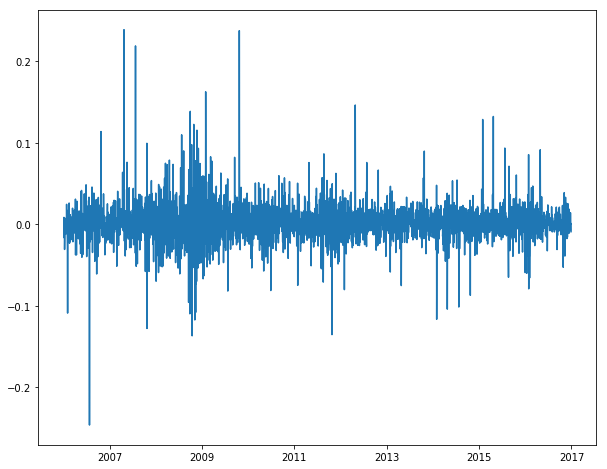

In [40]:
plt.figure(figsize=(10,8))
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

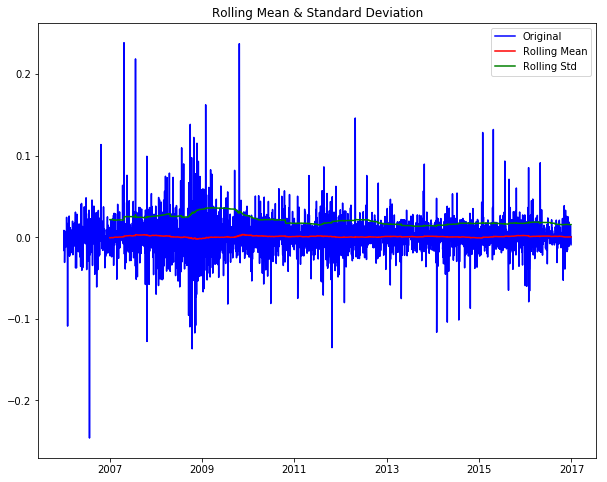

Results of Dickey-Fuller Test:
Test Statistic                  -33.533152
p-value                           0.000000
#Lags Used                        3.000000
Number of Observations Used    4009.000000
Critical Value (10%)             -2.567154
Critical Value (5%)              -2.862261
Critical Value (1%)              -3.431982
dtype: float64


In [41]:
plt.figure(figsize=(10,8))
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

### Decomposing

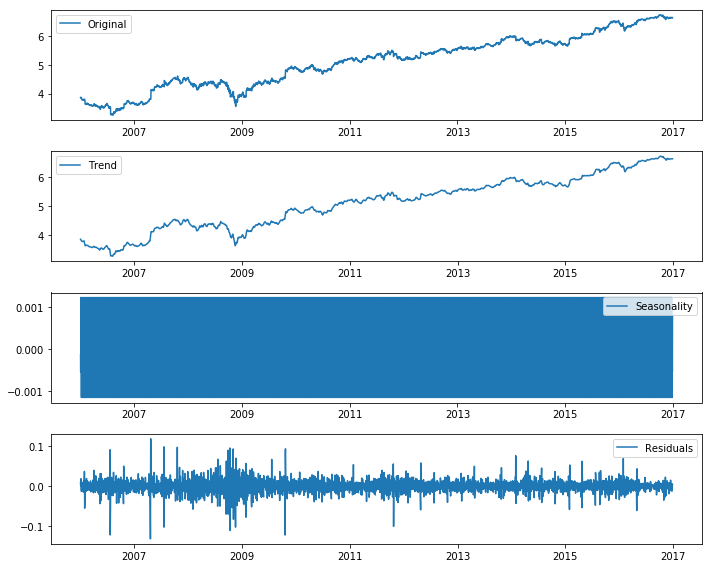

In [42]:
plt.figure(figsize=(10,8))
decomposition = seasonal_decompose(ts_log, freq=7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### check stationarity of residuals

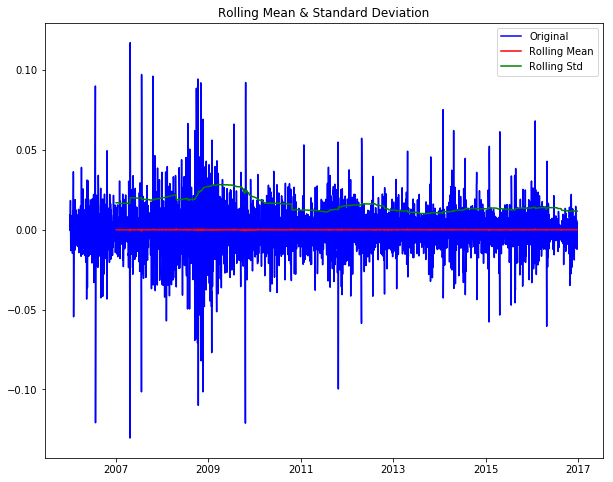

Results of Dickey-Fuller Test:
Test Statistic                  -18.970503
p-value                           0.000000
#Lags Used                       31.000000
Number of Observations Used    3976.000000
Critical Value (10%)             -2.567157
Critical Value (5%)              -2.862267
Critical Value (1%)              -3.431996
dtype: float64


In [43]:
plt.figure(figsize=(10,8))
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

# Forecasting a Time Series

### The ACF and PACF

In [44]:
train, test=ts_log_decompose['2006':'2015'], ts_log_decompose['2016':'2017']

In [45]:
lag_acf = acf(train, nlags=7)
lag_pacf = pacf(train, nlags=7, method='ols')

Text(0.5,1,'Autocorrelation Function')

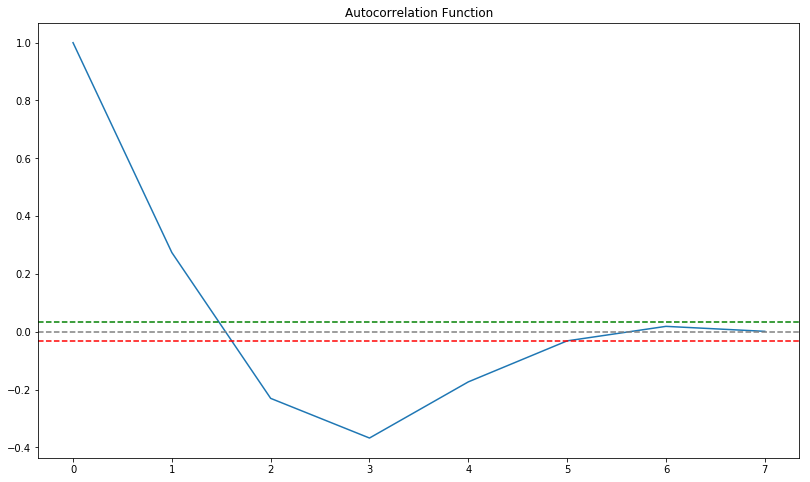

In [46]:
#Plot ACF:
plt.figure(figsize=(30,8))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

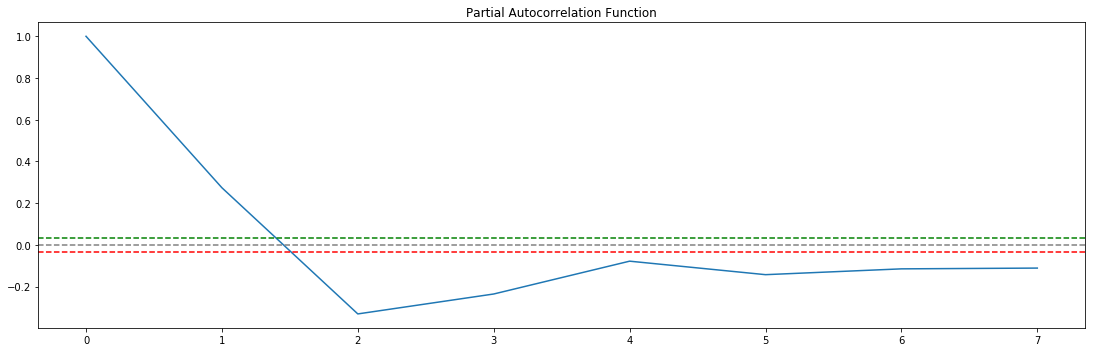

In [47]:
#Plot PACF:
plt.figure(figsize=(30,5))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# ARIMA model

### AR Model

Text(0.5,1,'RSS: 0.8518')

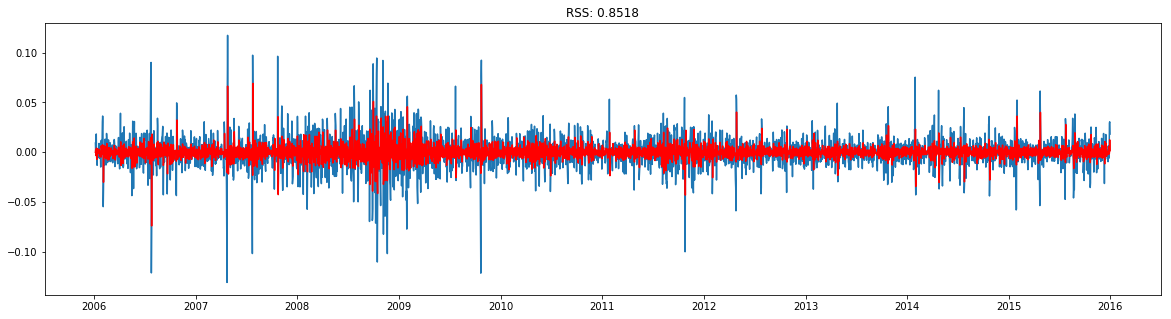

In [48]:
model = ARIMA(train, order=(2, 0, 0))  
results_AR = model.fit(disp=-1)  
plt.figure(figsize=(20,5))
plt.plot(train)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-train)**2))

### MA Model

Text(0.5,1,'RSS: 0.9150')

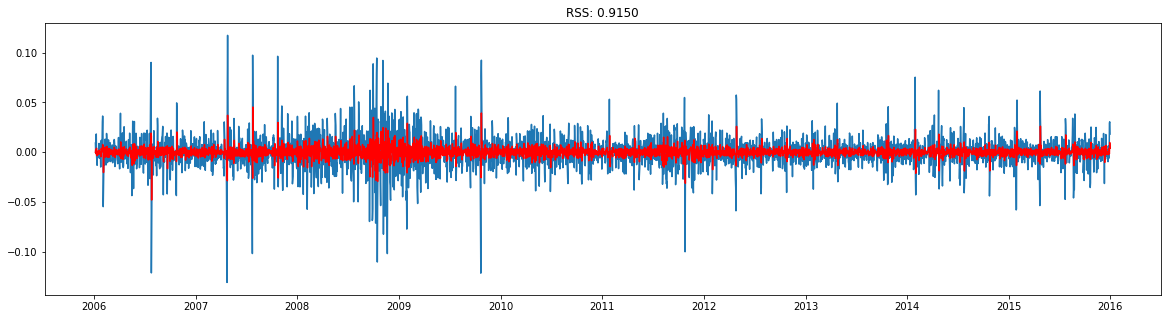

In [49]:
model = ARIMA(train, order=(0, 0, 2))  
results_MA = model.fit(disp=-1)  
plt.figure(figsize=(20,5))
plt.plot(train)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-train)**2))

### Combined Model

Text(0.5,1,'RSS: 0.7006')

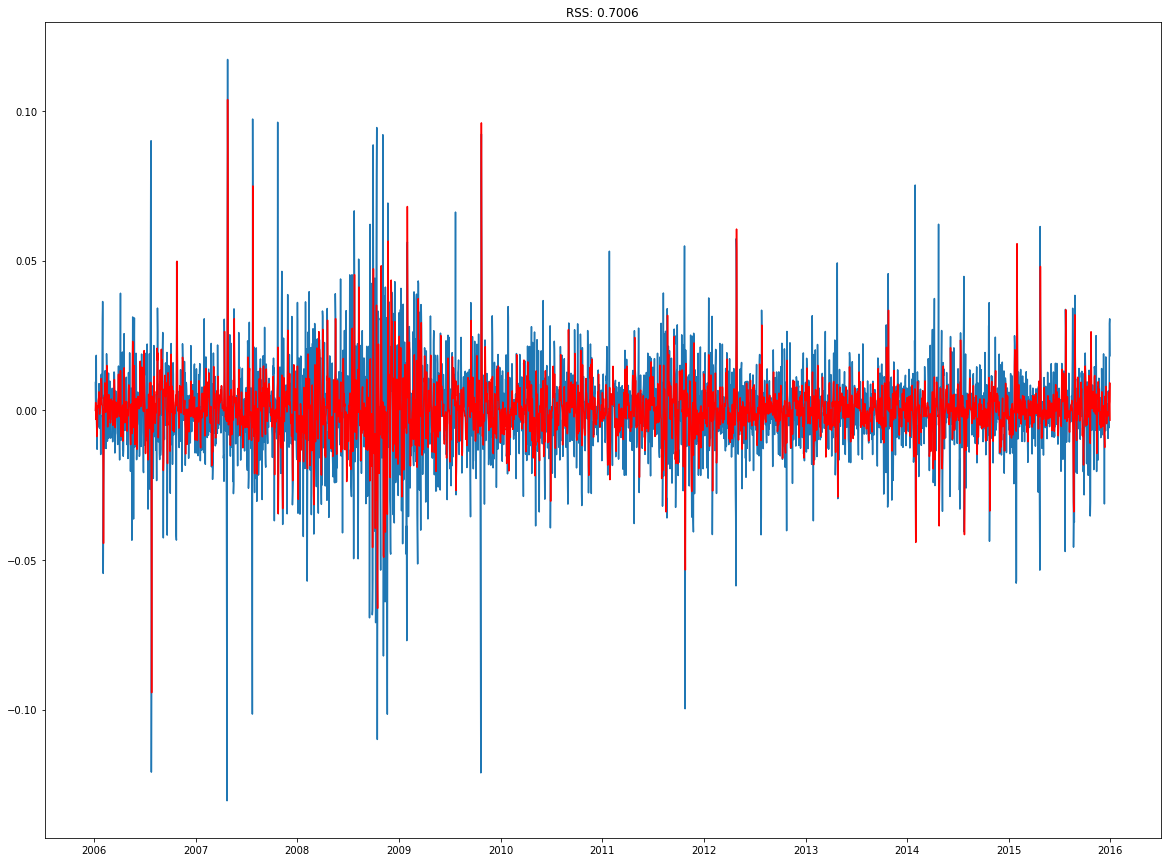

In [50]:
model = ARIMA(train, order=(2, 0, 2))  
results_ARIMA = model.fit(disp=0) 
plt.figure(figsize=(20,15))
plt.plot(train)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-train)**2))

In [51]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3647
Model:                     ARMA(2, 2)   Log Likelihood               10429.134
Method:                       css-mle   S.D. of innovations              0.014
Date:                Mon, 16 Jul 2018   AIC                         -20846.268
Time:                        13:51:00   BIC                         -20809.058
Sample:                    01-06-2006   HQIC                        -20833.016
                         - 12-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.456e-07   5.99e-07     -0.577      0.564   -1.52e-06    8.29e-07
ar.L1.Close     0.9855      0.028     34.680      0.000       0.930       1.041
ar.L2.Close    -0.3958      0.024    -16.607      0.000      -0.443      -0.349
ma.L1.Close    -0.8698      0.030    -29.258      0.000      -0.928      -0.812
ma.L2.Close    -0.1302      0.030     -4.380      0.000      -0.188      -0.072
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2448           -0.9883j            1.5895           -0.1068
AR.2            1.2448           +0.9883j            1.5895            0.1068
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -7.6823           +0.0000j            7.6823            0.5000
-----------------------------------------------------------------------------
"""

# Back to original scale

In [52]:
predictions_ARIMA_decomp = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_decomp.head())

Date
2006-01-06   -3.455856e-07
2006-01-07    2.587054e-03
2006-01-08   -3.052278e-03
2006-01-09    6.872197e-04
2006-01-10    1.532214e-03
Freq: D, dtype: float64


In [53]:
predictions_ARIMA_log=predictions_ARIMA_decomp+seasonal+trend

In [54]:
predictions_ARIMA_log.isnull().sum()

367

Text(0.5,1,'RMSE: 2.5901')

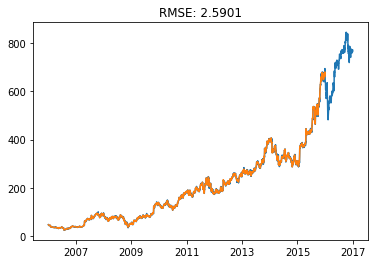

In [55]:
predictions_ARIMA = np.exp(predictions_ARIMA_log).resample('D').bfill()
predictions_ARIMA.dropna(inplace=True)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts[predictions_ARIMA.index])**2)/len(ts[predictions_ARIMA.index])))

In [56]:
pd.concat([predictions_ARIMA, ts[predictions_ARIMA.index]],axis=1 )

,0,Close
Date,,
2006-01-06,47.427219,47.87
2006-01-07,47.223095,47.08
2006-01-08,46.588551,47.08
2006-01-09,46.255553,47.08
2006-01-10,45.846178,45.65
2006-01-11,44.921026,44.93
2006-01-12,44.626763,44.36
2006-01-13,44.310403,44.40
2006-01-14,44.315263,44.00


In [57]:
predictions_ARIMA_test_decomp = pd.Series(results_ARIMA.predict(start='2016-01-01', end='2017-12-26'), copy=True)
print(predictions_ARIMA_test_decomp.head())

2016-01-01   -0.015646
2016-01-02   -0.025431
2016-01-03   -0.018868
2016-01-04   -0.008528
2016-01-05   -0.000936
Freq: D, dtype: float64


In [58]:
predictions_ARIMA_test_log=predictions_ARIMA_test_decomp+seasonal[-(len(test)):]+trend[-(len(test)):]

Text(0.5,1,'RMSE: 7.4987')

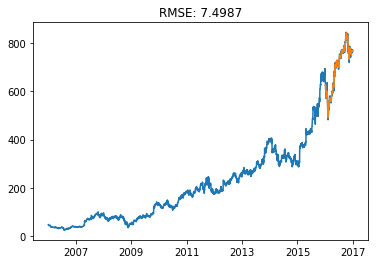

In [59]:
predictions_ARIMA_test = np.exp(predictions_ARIMA_test_log).resample('D').bfill()
predictions_ARIMA_test.dropna(inplace=True)
plt.plot(ts)
plt.plot(predictions_ARIMA_test)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA_test-ts[predictions_ARIMA_test.index])**2)/len(ts[predictions_ARIMA_test.index])))

In [60]:
pd.concat([predictions_ARIMA_test, ts[predictions_ARIMA_test.index]],axis=1 )

,0,Close
2016-01-04,625.602764,636.99
2016-01-05,626.685974,633.79
2016-01-06,625.804360,632.65
2016-01-07,624.115645,607.94
2016-01-08,621.020900,607.05
2016-01-09,617.463907,617.74
2016-01-10,609.259273,617.74
2016-01-11,606.522650,617.74
2016-01-12,601.746715,617.89
2016-01-13,595.369933,581.81
